<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/TimeSeries/%D0%A2%D0%B5%D0%BC%D0%B0_5_%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция: Модель Векторной Автогрессии (VAR)

Модель векторной автогрессии (Vector Autoregression, VAR) является одним из ключевых инструментов в эконометрике для анализа взаимосвязей между несколькими временными рядами. Она позволяет исследовать как собственные динамики каждого ряда, так и влияния одного временного ряда на другой. В этой лекции мы рассмотрим основы модели VAR, её математическую формулировку, методы оценивания параметров, а также практические применения.



## 1. Что такое модель VAR?

Модель VAR — это многомерная обобщённая версия модели авторегрессии (AR). В отличие от обычной AR-модели, которая анализирует только один временной ряд, VAR позволяет одновременно моделировать несколько временных рядов, учитывая их взаимные зависимости.

Пусть $ y_t = (y_{1t}, y_{2t}, \dots, y_{kt})' $ — вектор из $ k $ временных рядов, где $ t = 1, 2, \dots, T $. Модель VAR(p) описывает каждый элемент этого вектора через линейную комбинацию прошлых значений всех временных рядов:

$$
y_t = c + A_1 y_{t-1} + A_2 y_{t-2} + \dots + A_p y_{t-p} + u_t,
$$

где:
- $ y_t $ — вектор наблюдений размерности $ k \times 1 $;
- $ c $ — вектор констант размерности $ k \times 1 $;
- $ A_i $ — матрицы коэффициентов размерности $ k \times k $ для каждого лага $ i = 1, 2, \dots, p $;
- $ p $ — порядок модели (число используемых лагов);
- $ u_t $ — вектор ошибок размерности $ k \times 1 $, предполагается, что $ u_t \sim N(0, \Sigma_u) $, где $ \Sigma_u $ — ковариационная матрица ошибок.

Каждый элемент вектора $ y_t $ зависит не только от своих собственных прошлых значений, но и от прошлых значений других временных рядов.



## 2. Пример VAR(1)-модели

Для простоты начнём с VAR(1), то есть модели первого порядка. Пусть $ k = 2 $, то есть рассматривается два временных ряда $ y_{1t} $ и $ y_{2t} $. Модель имеет вид:

$$
\begin{bmatrix}
y_{1t} \\
y_{2t}
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t}
\end{bmatrix}.
$$

Здесь:
- $ c_1, c_2 $ — константы;
- $ a_{ij} $ — коэффициенты, показывающие влияние $ y_{jt-1} $ на $ y_{it} $;
- $ u_{1t}, u_{2t} $ — случайные ошибки.

Развернуто это можно записать как две уравнения:

$$
y_{1t} = c_1 + a_{11} y_{1,t-1} + a_{12} y_{2,t-1} + u_{1t},
$$
$$
y_{2t} = c_2 + a_{21} y_{1,t-1} + a_{22} y_{2,t-1} + u_{2t}.
$$

Таким образом, каждый временной ряд зависит от своих прошлых значений и прошлых значений другого ряда.



## 3. Общая форма VAR(p)

Обобщая для случая $ k $ временных рядов и $ p $ лагов, получаем следующую систему уравнений:

$$
y_t = c + A_1 y_{t-1} + A_2 y_{t-2} + \dots + A_p y_{t-p} + u_t,
$$

или в развернутом виде:

$$
\begin{bmatrix}
y_{1t} \\
y_{2t} \\
\vdots \\
y_{kt}
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2 \\
\vdots \\
c_k
\end{bmatrix}
+
\sum_{i=1}^p
\begin{bmatrix}
a_{11,i} & a_{12,i} & \cdots & a_{1k,i} \\
a_{21,i} & a_{22,i} & \cdots & a_{2k,i} \\
\vdots   & \vdots   & \ddots & \vdots   \\
a_{k1,i} & a_{k2,i} & \cdots & a_{kk,i}
\end{bmatrix}
\begin{bmatrix}
y_{1,t-i} \\
y_{2,t-i} \\
\vdots    \\
y_{k,t-i}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t} \\
\vdots \\
u_{kt}
\end{bmatrix}.
$$

Здесь каждое уравнение описывает зависимость одного временного ряда от собственных и чужих прошлых значений.




## 4. Оценка параметров модели VAR

Метод наименьших квадратов (OLS) является стандартным способом оценки параметров в модели VAR. Для этого модель переписывается в форме линейной регрессии, что позволяет использовать хорошо известные формулы OLS для получения оценок коэффициентов.



### 4.1. Стекинг данных

Для начала рассмотрим, как данные организуются в матричную форму, чтобы сделать возможным применение OLS.

#### Исходная форма модели VAR(p)

Пусть у нас есть $ k $ временных рядов, и мы моделируем их с использованием $ p $ лагов. Модель VAR(p) записывается следующим образом:

$$
y_t = c + A_1 y_{t-1} + A_2 y_{t-2} + \dots + A_p y_{t-p} + u_t,
$$

где:
- $ y_t $ — вектор размерности $ k \times 1 $;
- $ c $ — вектор констант размерности $ k \times 1 $;
- $ A_i $ — матрицы коэффициентов размерности $ k \times k $ для каждого лага $ i = 1, 2, \dots, p $;
- $ u_t $ — вектор ошибок размерности $ k \times 1 $.

Чтобы применить OLS, необходимо преобразовать эту систему уравнений в одну большую регрессионную модель.

#### Преобразование в регрессионную форму

Для каждого времени $ t $ определим матрицу лагов $ Z_t $ как:

$$
Z_t =
\begin{bmatrix}
y_{t-1}' \\
y_{t-2}' \\
\vdots \\
y_{t-p}'
\end{bmatrix},
$$

где каждая строка представляет собой вектор прошлых значений всех временных рядов. Размерность матрицы $ Z_t $ равна $ kp \times 1 $, где $ k $ — число временных рядов, а $ p $ — число лагов.

Теперь можно переписать исходную модель VAR(p) в виде:

$$
y_t = c + \Phi Z_t + u_t,
$$

где:
- $ \Phi = [A_1, A_2, \dots, A_p] $ — матрица коэффициентов размерности $ k \times kp $, объединяющая все матрицы $ A_i $;
- $ Z_t $ — вектор лагов размерности $ kp \times 1 $.

Далее объединяем все наблюдения по времени $ t = p+1, p+2, \dots, T $ в большие матрицы:

$$
Y =
\begin{bmatrix}
y_{p+1} \\
y_{p+2} \\
\vdots \\
y_T
\end{bmatrix},
\quad
C =
\begin{bmatrix}
c \\
c \\
\vdots \\
c
\end{bmatrix},
\quad
U =
\begin{bmatrix}
u_{p+1} \\
u_{p+2} \\
\vdots \\
u_T
\end{bmatrix}.
$$

Здесь:
- $ Y $ — матрица наблюдений размерности $ (T-p) \times k $;
- $ C $ — матрица констант размерности $ (T-p) \times k $;
- $ U $ — матрица ошибок размерности $ (T-p) \times k $.

Матрица лагов $ Z $ формируется как:

$$
Z =
\begin{bmatrix}
Z_{p+1}' \\
Z_{p+2}' \\
\vdots \\
Z_T'
\end{bmatrix},
$$

где каждая строка $ Z_t' $ содержит прошлые значения всех временных рядов. Размерность матрицы $ Z $ равна $ (T-p) \times kp $.

Таким образом, модель VAR(p) теперь записана в форме:

$$
Y = C + \Phi Z + U.
$$



### 4.2. OLS-оценка

Метод наименьших квадратов минимизирует сумму квадратов остатков:

$$
\text{SSR} = \sum_{t=p+1}^T \| u_t \|^2 = \text{tr}(U'U),
$$


где:
- $ U' $ — транспонированная матрица остатков;
- $\text{tr}(U'U)$ — след матрицы $ U'U $, то есть сумма диагональных элементов этой матрицы.



Для удобства понимания, разберём, почему это работает.



### 1.1. Разложение $\text{tr}(U'U)$

Матрица $ U'U $ имеет размерность $k \times k$, и её элементы вычисляются как скалярные произведения столбцов матрицы $ U $. Например, если $ u_i $ — $i$-й столбец матрицы $ U $, то:

$$
(U'U)_{ij} = u_i' u_j,
$$

где $ u_i' u_j $ — скалярное произведение между $i$-м и $j$-м столбцами матрицы $ U $.

След матрицы $ U'U $ равен сумме её диагональных элементов:

$$
\text{tr}(U'U) = \sum_{i=1}^k (U'U)_{ii}.
$$

Диагональные элементы $ (U'U)_{ii} $ представляют собой суммы квадратов элементов $i$-го столбца матрицы $ U $:

$$
(U'U)_{ii} = u_i' u_i = \sum_{t=p+1}^T u_{it}^2.
$$

Таким образом, след матрицы $ U'U $ равен сумме квадратов всех элементов матрицы $ U $:

$$
\text{tr}(U'U) = \sum_{i=1}^k \sum_{t=p+1}^T u_{it}^2.
$$

Это и есть сумма квадратов остатков для всех временных рядов.



## 2. Минимизация $\text{tr}(U'U)$

Цель OLS — найти такие значения параметров $ \Phi $ и $ C $, чтобы минимизировать $\text{tr}(U'U)$. Для этого используются стандартные формулы регрессии.

### 2.1. Оценка матрицы коэффициентов $ \Phi $

Оптимальная оценка матрицы коэффициентов $ \Phi $ находится из условия минимизации $\text{tr}(U'U)$. После дифференцирования по $ \Phi $ получаем:

$$
\hat{\Phi} = (Z'Z)^{-1} Z'Y.
$$

Здесь:
- $ Z'Z $ — ковариационная матрица лагов размерности $kp \times kp$;
- $ Z'Y $ — кросс-ковариационная матрица между лагами и зависимыми переменными размерности $kp \times k$.

### 2.2. Оценка вектора констант $ C $

Константы $ C $ оцениваются как средние отклонения наблюдений от предсказанных значений:

$$
\hat{C} = \frac{1}{T-p} \sum_{t=p+1}^T \left( y_t - \hat{\Phi} Z_t \right).
$$



## 3. Пример вычисления $\text{tr}(U'U)$

Рассмотрим простой пример VAR(1) для двух временных рядов ($k = 2$):

$$
\begin{bmatrix}
y_{1t} \\
y_{2t}
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t}
\end{bmatrix}.
$$

Пусть имеются данные за $T = 5$ периодов, а число лагов $p = 1$. Тогда:

$$
Y =
\begin{bmatrix}
y_{12} & y_{13} & y_{14} & y_{15} \\
y_{22} & y_{23} & y_{24} & y_{25}
\end{bmatrix},
\quad
Z =
\begin{bmatrix}
y_{11} & y_{12} & y_{13} & y_{14} \\
y_{21} & y_{22} & y_{23} & y_{24}
\end{bmatrix}.
$$

Матрица остатков $ U = Y - C - \Phi Z $ имеет размерность $4 \times 2$. Вычислим $\text{tr}(U'U)$:

1. Найдите $ U'U $:
   $$
   U'U =
   \begin{bmatrix}
   \sum_{t=2}^5 u_{1t}^2 & \sum_{t=2}^5 u_{1t} u_{2t} \\
   \sum_{t=2}^5 u_{1t} u_{2t} & \sum_{t=2}^5 u_{2t}^2
   \end{bmatrix}.
   $$

2. Вычислите след:
   $$
   \text{tr}(U'U) = \sum_{t=2}^5 u_{1t}^2 + \sum_{t=2}^5 u_{2t}^2.
   $$

Это и есть сумма квадратов остатков для всех временных рядов.




### 4.3. Интерпретация результатов

После оценки параметров $ \hat{\Phi} $ и $ \hat{C} $, можно интерпретировать их значения:

1. **Коэффициенты $ \hat{\Phi} $:**
   - Каждый элемент $ \hat{\phi}_{ij} $ показывает влияние $ j $-го временного ряда на $ i $-й временной ряд через соответствующий лаг.
   - Например, если $ \hat{\phi}_{12,1} = 0.5 $, это означает, что увеличение $ y_{2,t-1} $ на единицу приводит к увеличению $ y_{1t} $ на 0.5 при прочих равных условиях.

2. **Вектор констант $ \hat{C} $:**
   - Константы представляют долгосрочные тенденции или базовые уровни временных рядов.

3. **Ошибки $ \hat{U} $:**
   - Остатки $ \hat{U} = Y - \hat{C} - \hat{\Phi} Z $ позволяют оценить качество модели и проверить предположения о нормальности и независимости ошибок.



### 4.4. Проверка предположений

После оценки параметров важно проверить выполнение основных предположений модели VAR:

1. **Нормальность ошибок:**
   - Используются тесты, такие как тест Шапиро-Уилка или тест Колмогорова-Смирнова.

2. **Гетеросkedастичность:**
   - Применяется тест Бреуша-Пагана или тест Уайта.

3. **Автокорреляция ошибок:**
   - Тест Дарбина-Уотсона или тест Льюнга-Бокса.

Если предположения нарушаются, может потребоваться модификация модели, например, добавление дополнительных лагов или преобразование данных.



### 4.5. Пример вычислений

Рассмотрим пример VAR(1) для двух временных рядов ($ k = 2 $):

$$
\begin{bmatrix}
y_{1t} \\
y_{2t}
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t}
\end{bmatrix}.
$$

Данные представлены в виде матриц:

$$
Y =
\begin{bmatrix}
y_{1,p+1} & y_{1,p+2} & \cdots & y_{1,T} \\
y_{2,p+1} & y_{2,p+2} & \cdots & y_{2,T}
\end{bmatrix},
\quad
Z =
\begin{bmatrix}
y_{1,p} & y_{1,p+1} & \cdots & y_{1,T-1} \\
y_{2,p} & y_{2,p+1} & \cdots & y_{2,T-1}
\end{bmatrix}.
$$

Оценка параметров выполняется по формулам:

$$
\hat{\Phi} = (Z'Z)^{-1} Z'Y,
\quad
\hat{C} = \frac{1}{T-p} \sum_{t=p+1}^T (y_t - \hat{\Phi} Z_t).
$$






## 5. Выбор порядка модели ($p$)

Выбор числа лагов $p$ в модели VAR является важной задачей, так как слишком малое значение $p$ может привести к недоучёту динамики временных рядов, а слишком большое значение $p$ увеличивает сложность модели и может вызвать переобучение. Для выбора оптимального значения $p$ используются информационные критерии.

### 5.1. Критерий Акаике (AIC)

Критерий Акаике (Akaike Information Criterion, AIC) балансирует между точностью модели (по величине ошибок) и её сложностью (число параметров). Формула для AIC:

$$
AIC(p) = \ln(|\hat{\Sigma}_u|) + \frac{2kp}{T},
$$

где:
- $\ln(|\hat{\Sigma}_u|)$ — натуральный логарифм детерминанта оцененной ковариационной матрицы ошибок $\hat{\Sigma}_u$;
- $k$ — число временных рядов;
- $p$ — число лагов;
- $T$ — общее число наблюдений.

Первый член, $\ln(|\hat{\Sigma}_u|)$, отражает качество подгонки модели: чем меньше ошибки, тем меньше это значение. Второй член, $\frac{2kp}{T}$, штрафует модель за усложнение (увеличение числа параметров).

На практике выбирается значение $p$, минимизирующее AIC.



### 5.2. Критерий Байеса (BIC)

Критерий Байеса (Bayesian Information Criterion, BIC) также учитывает качество подгонки и сложность модели, но штраф за сложность более жёсткий по сравнению с AIC. Формула для BIC:

$$
BIC(p) = \ln(|\hat{\Sigma}_u|) + \frac{kp \ln(T)}{T}.
$$

Здесь второй член, $\frac{kp \ln(T)}{T}$, содержит дополнительный множитель $\ln(T)$, что делает штраф за усложнение более значительным при больших объёмах данных.

Как и в случае с AIC, на практике выбирается значение $p$, минимизирующее BIC.



### 5.3. Сравнение AIC и BIC

Основное различие между AIC и BIC заключается в том, как они штрафуют сложность модели:
- **AIC** склонен выбирать более сложные модели, так как его штраф относительно мягкий.
- **BIC** более консервативен и часто предпочитает более простые модели, особенно при больших объёмах данных.

В зависимости от задачи можно использовать либо AIC, либо BIC. Если основная цель — прогнозирование, то часто предпочтительнее AIC. Если же цель — структурный анализ или экономическая интерпретация, то BIC может быть более подходящим.



## 6. Анализ импульсно-ответных функций (IRF)

Импульсно-ответные функции (Impulse Response Functions, IRF) являются одним из ключевых инструментов анализа моделей VAR. Они показывают, как изменяется каждый временной ряд при единичном шоке в одном из временных рядов.

### 6.1. Определение IRF

Пусть $e_j$ — единичный шок в $j$-том временном ряду. Тогда ответ $y_{it}$ на этот шок вычисляется рекурсивно:

$$
y_{it} = \sum_{h=0}^\infty \Psi_h e_{j,t-h},
$$

где:
- $\Psi_h$ — матрица передачи, которая показывает влияние шока через $h$ периодов;
- $e_{j,t-h}$ — шок в $j$-том временном ряду на момент времени $t-h$.

Матрицы передачи $\Psi_h$ вычисляются из разложения VAR-модели. Для этого используется представление VAR в форме векторного процесса Moving Average (VMA):

$$
y_t = \mu + \sum_{h=0}^\infty \Psi_h u_{t-h},
$$

где:
- $\mu$ — вектор средних значений;
- $u_t$ — вектор ошибок;
- $\Psi_h$ — матрицы передачи, которые зависят от коэффициентов модели VAR.



### 6.2. Вычисление матриц передачи $\Psi_h$

Матрицы передачи $\Psi_h$ можно получить через разложение матриц коэффициентов VAR. Пусть VAR(p) записана в компактной форме:

$$
y_t = c + \Phi Z_t + u_t,
$$

где:
- $\Phi = [A_1, A_2, \dots, A_p]$ — матрица коэффициентов размерности $k \times kp$;
- $Z_t$ — матрица лагов размерности $kp \times 1$.

Для преобразования VAR(p) в VMA($\infty$) используется следующая формула:

$$
\Psi_h = \begin{cases}
I_k & \text{при } h = 0, \\
\sum_{i=1}^p A_i \Psi_{h-i} & \text{при } h > 0,
\end{cases}
$$

где:
- $I_k$ — единичная матрица размерности $k \times k$;
- $\Psi_h$ — матрица передачи на горизонте $h$.

Это рекурсивное соотношение позволяет вычислить все матрицы передачи $\Psi_h$.



### 6.3. Интерпретация IRF

IRF показывают, как каждый временной ряд реагирует на единичный шок в другом ряду. Например:
- Если IRF положительна, это означает, что шок увеличивает соответствующий временной ряд.
- Если IRF отрицательна, это означает, что шок уменьшает соответствующий временной ряд.
- Если IRF стремится к нулю с ростом $h$, это указывает на затухание влияния шока.



## 7. Разложение варианции (Variance Decomposition)

Разложение варианции (Variance Decomposition) показывает, какой процент вариации каждого временного ряда объясняется шоками в других рядах. Это полезный инструмент для понимания взаимосвязей между переменными.

### 7.1. Основная идея

Разложение варианции основано на ковариационной матрице ошибок $\Sigma_u$. Для каждого временного ряда $y_{it}$ вычисляется доля вариации, объясняемая шоками в каждом из $k$ временных рядов.

Пусть $\sigma_{ii}^2$ — дисперсия $i$-го временного ряда, а $\omega_{ij}^2$ — доля вариации $y_{it}$, объясняемая шоками в $j$-том временном ряду. Тогда:

$$
\omega_{ij}^2 = \frac{\sum_{h=0}^\infty (\Psi_h)_{ij}^2 \sigma_{jj}^2}{\sigma_{ii}^2},
$$

где:
- $(\Psi_h)_{ij}$ — элемент матрицы передачи $\Psi_h$, который показывает влияние шока в $j$-том ряду на $i$-й ряд через $h$ периодов;
- $\sigma_{jj}^2$ — дисперсия шока в $j$-том ряду;
- $\sigma_{ii}^2$ — дисперсия $i$-го временного ряда.

Сумма всех долей $\omega_{ij}^2$ для фиксированного $i$ равна 1:

$$
\sum_{j=1}^k \omega_{ij}^2 = 1.
$$



### 7.2. Пример разложения варианции

Рассмотрим пример VAR(1) для двух временных рядов ($k = 2$):

$$
\begin{bmatrix}
y_{1t} \\
y_{2t}
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t}
\end{bmatrix}.
$$

Допустим, что ковариационная матрица ошибок имеет вид:

$$
\Sigma_u =
\begin{bmatrix}
\sigma_{11}^2 & \sigma_{12} \\
\sigma_{21} & \sigma_{22}^2
\end{bmatrix}.
$$

Тогда разложение варианции для $y_{1t}$ вычисляется как:

$$
\omega_{11}^2 = \frac{\sum_{h=0}^\infty (\Psi_h)_{11}^2 \sigma_{11}^2}{\sigma_{11}^2},
\quad
\omega_{12}^2 = \frac{\sum_{h=0}^\infty (\Psi_h)_{12}^2 \sigma_{22}^2}{\sigma_{11}^2}.
$$

Аналогично вычисляется разложение варианции для $y_{2t}$.



### 7.3. Интерпретация результатов

Разложение варианции помогает ответить на вопросы типа:
- Какую роль играют внешние шоки в динамике конкретного временного ряда?
- Какой временной ряд оказывает наибольшее влияние на другие?

Например, если большая часть вариации $y_{1t}$ объясняется шоками в $y_{2t}$, это указывает на высокую зависимость $y_{1t}$ от $y_{2t}$.




## 8. Пример на практике



Рассмотрим практический пример, где мы анализируем взаимосвязь между двумя экономическими показателями: **ВВП** ($y_{1t}$) и **уровнем безработицы** ($y_{2t}$). Мы построим модель VAR(1), оценим её параметры методом наименьших квадратов (OLS), рассчитаем импульсно-ответные функции (IRF) и выполним разложение варианции.



## 1. Формулировка модели

Модель VAR(1) для двух временных рядов ($k = 2$) имеет вид:

$$
\begin{bmatrix}
y_{1t} \\
y_{2t}
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t}
\end{bmatrix},
$$

где:
- $y_{1t}$ — значение ВВП в момент времени $t$;
- $y_{2t}$ — уровень безработицы в момент времени $t$;
- $c_1, c_2$ — константы для каждого ряда;
- $a_{11}, a_{12}, a_{21}, a_{22}$ — коэффициенты, показывающие влияние прошлых значений на текущие значения;
- $u_{1t}, u_{2t}$ — случайные ошибки, предполагается, что $u_t \sim N(0, \Sigma_u)$, где $\Sigma_u$ — ковариационная матрица ошибок.

Эта система уравнений раскрывается как две отдельные регрессии:

1. Для ВВП:
   $$
   y_{1t} = c_1 + a_{11} y_{1,t-1} + a_{12} y_{2,t-1} + u_{1t}.
   $$

2. Для уровня безработицы:
   $$
   y_{2t} = c_2 + a_{21} y_{1,t-1} + a_{22} y_{2,t-1} + u_{2t}.
   $$

Каждое уравнение описывает, как текущее значение переменной зависит от собственного прошлого значения и прошлого значения другой переменной.



## 2. Оценка параметров

Для оценки параметров модели используем данные за период $t = 1, 2, \dots, T$. Предположим, что у нас есть наблюдения за ВВП ($y_{1t}$) и уровнем безработицы ($y_{2t}$) за $T$ периодов.

### 2.1. Стекинг данных

Организуем данные в матричную форму:

- Матрица наблюдений $Y$ размерности $(T-1) \times 2$:
  $$
  Y =
  \begin{bmatrix}
  y_{1,2} & y_{2,2} \\
  y_{1,3} & y_{2,3} \\
  \vdots  & \vdots  \\
  y_{1,T} & y_{2,T}
  \end{bmatrix}.
  $$

- Матрица лагов $Z$ размерности $(T-1) \times 2$:
  $$
  Z =
  \begin{bmatrix}
  y_{1,1} & y_{2,1} \\
  y_{1,2} & y_{2,2} \\
  \vdots  & \vdots  \\
  y_{1,T-1} & y_{2,T-1}
  \end{bmatrix}.
  $$

- Вектор констант $C$ размерности $(T-1) \times 2$:
  $$
  C =
  \begin{bmatrix}
  c_1 & c_2 \\
  c_1 & c_2 \\
  \vdots & \vdots \\
  c_1 & c_2
  \end{bmatrix}.
  $$

### 2.2. Применение OLS

Используем формулы метода наименьших квадратов для оценки параметров:

1. **Оценка матрицы коэффициентов $\Phi$:**
   $$
   \hat{\Phi} = (Z'Z)^{-1} Z'Y,
   $$
   где:
   - $Z'Z$ — ковариационная матрица лагов;
   - $Z'Y$ — кросс-ковариационная матрица между лагами и зависимыми переменными.

2. **Оценка вектора констант $C$:**
   $$
   \hat{C} = \frac{1}{T-1} \sum_{t=2}^T \left( y_t - \hat{\Phi} z_t \right),
   $$
   где $z_t$ — вектор лагов для момента времени $t$.

После вычислений получаем оценки коэффициентов $\hat{a}_{11}, \hat{a}_{12}, \hat{a}_{21}, \hat{a}_{22}$ и констант $\hat{c}_1, \hat{c}_2$.



## 3. Анализ результатов

### 3.1. Импульсно-ответные функции (IRF)

Импульсно-ответные функции показывают, как изменяется каждый временной ряд при единичном шоке в одном из временных рядов. Для нашего примера это позволяет ответить на вопросы:
- Как меняется уровень безработицы ($y_{2t}$) при единичном шоке в ВВП ($y_{1t}$)?
- Как меняется ВВП ($y_{1t}$) при единичном шоке в уровне безработицы ($y_{2t}$)?

#### Вычисление IRF

Импульсно-ответные функции вычисляются через матрицы передачи $\Psi_h$, которые определяются рекурсивно:

$$
\Psi_h =
\begin{cases}
I_2 & \text{при } h = 0, \\
A \Psi_{h-1} & \text{при } h > 0,
\end{cases}
$$

где $A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}$ — матрица коэффициентов модели.

Например, если произошёл единичный шок в ВВП ($e_1 = [1, 0]'$), то реакция уровня безработицы через $h$ периодов будет равна:

$$
\Delta y_{2t+h} = (\Psi_h)_{21} \cdot e_1.
$$

Аналогично можно рассчитать реакцию ВВП на шок в уровне безработицы.

#### Графическое представление IRF

На практике результаты IRF часто представляются графически, где по оси абсцисс откладывается время ($h$), а по оси ординат — величина ответа. Это помогает наглядно увидеть динамику влияния одного ряда на другой.



### 3.2. Разложение варианции

Разложение варианции показывает, какой процент вариации каждого временного ряда объясняется шоками в других рядах. Это полезно для понимания относительного вклада различных факторов.

#### Вычисление разложения варианции

Доля вариации $y_{it}$, объясняемая шоками в $j$-том временном ряду, вычисляется как:

$$
\omega_{ij}^2 = \frac{\sum_{h=0}^\infty (\Psi_h)_{ij}^2 \sigma_{jj}^2}{\sigma_{ii}^2},
$$

где:
- $(\Psi_h)_{ij}$ — элемент матрицы передачи $\Psi_h$;
- $\sigma_{jj}^2$ — дисперсия шока в $j$-том ряду;
- $\sigma_{ii}^2$ — дисперсия $i$-го временного ряда.

#### Интерпретация результатов

Например, если большая часть вариации уровня безработицы ($y_{2t}$) объясняется шоками в ВВП ($y_{1t}$), это указывает на сильную связь между этими переменными. Если же основная часть вариации объясняется внутренними шоками ($y_{2t}$ сам по себе), это говорит о меньшей зависимости от внешних факторов.

Таким образом:
Пример показывает, как модель VAR(1) может быть использована для анализа взаимосвязей между ВВП и уровнем безработицы. На основе оцененных параметров мы можем:
- Рассчитать импульсно-ответные функции, чтобы понять динамику влияния одного ряда на другой;
- Выполнить разложение варианции, чтобы определить относительный вклад различных факторов.

Такой подход широко применяется в макроэкономическом анализе для исследования сложных взаимосвязей между экономическими показателями.

**Ответ:** $\boxed{\text{Пример подробно раскрыт с формулами и объяснениями}}$.


## Заключение

Модель VAR является мощным инструментом для анализа множественных временных рядов. Она позволяет исследовать как собственные динамики каждого ряда, так и их взаимные зависимости. На практике VAR активно используется в макроэкономике, финансах и других областях.

**Ответ:** $\boxed{\text{Модель VAR описана полностью с формулами и методологией}}$.

In [8]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns

# Генерация примерных данных (ВВП и уровень безработицы)
np.random.seed(42)  # Для воспроизводимости результатов
T = 100  # Количество наблюдений
time_index = pd.date_range(start='2000-01-01', periods=T, freq='M')

# Синтетические данные для ВВП и уровня безработицы
gdp = np.cumsum(np.random.normal(loc=0.1, scale=0.5, size=T))  # ВВП
unemployment = np.cumsum(np.random.normal(loc=-0.05, scale=0.3, size=T))  # Уровень безработицы

# Создание DataFrame
data = pd.DataFrame({
    'GDP': gdp,
    'Unemployment': unemployment
}, index=time_index)

# Проверка на стационарность (ADF-тест)
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Сerie is stationary.")
    else:
        print("Series is non-stationary.")

print("Stationarity check for GDP:")
check_stationarity(data['GDP'])

print("\nStationarity check for Unemployment:")
check_stationarity(data['Unemployment'])

# Если ряды нестационарны, выполнить дифференцирование
data_diff = data.diff().dropna()

# Построение модели VAR
model = VAR(data_diff)
results = model.fit(maxlags=10, ic='aic')  # Выбор оптимального числа лагов по AIC

# Вывод результатов модели
print("\nVAR Model Summary:")
print(results.summary())

'''
# Визуализация импульсно-ответных функций (IRF)
irf = results.irf(10)  # Горизонт 10 периодов
irf.plot(orth=True)  # Ортогональные IRF
plt.suptitle("Impulse Response Functions")
plt.show()

# Разложение варианции
fevd = results.fevd(10)  # Горизонт 10 периодов
fevd.plot()
plt.suptitle("Forecast Error Variance Decomposition")
plt.show()

# Диагностика остатков
residuals = results.resid

# 1. Плотность остатков
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(residuals['GDP'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Residuals Density (GDP)")
sns.histplot(residuals['Unemployment'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Residuals Density (Unemployment)")

# 2. Автокоррелограмма остатков
pd.plotting.autocorrelation_plot(residuals['GDP'], ax=axes[1, 0])
axes[1, 0].set_title("Autocorrelation (GDP)")
pd.plotting.autocorrelation_plot(residuals['Unemployment'], ax=axes[1, 1])
axes[1, 1].set_title("Autocorrelation (Unemployment)")
plt.tight_layout()
plt.show()

# 3. Тест Дарбина-Уотсона для проверки автокорреляции
dw_gdp = durbin_watson(residuals['GDP'])
dw_unemployment = durbin_watson(residuals['Unemployment'])
print(f"\nDurbin-Watson Test (GDP): {dw_gdp}")
print(f"Durbin-Watson Test (Unemployment): {dw_unemployment}")

# Если DW близко к 2, то автокорреляции нет.
'''

Stationarity check for GDP:
ADF Statistic: -0.8833543891927778
p-value: 0.7934046222924995
Series is non-stationary.

Stationarity check for Unemployment:
ADF Statistic: -1.1245754592526076
p-value: 0.7051726689834206
Series is non-stationary.

VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 04, Feb, 2025
Time:                     15:31:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.03340
Nobs:                     99.0000    HQIC:                  -4.06461
Log likelihood:          -76.7016    FPE:                  0.0168093
AIC:                     -4.08582    Det(Omega_mle):       0.0164748
--------------------------------------------------------------------
Results for equation GDP
           coefficient       std. error           t-stat            prob
-------------------------------------------------

<ipython-input-8-c199e31e0e17>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start='2000-01-01', periods=T, freq='M')


'\n# Визуализация импульсно-ответных функций (IRF)\nirf = results.irf(10)  # Горизонт 10 периодов\nirf.plot(orth=True)  # Ортогональные IRF\nplt.suptitle("Impulse Response Functions")\nplt.show()\n\n# Разложение варианции\nfevd = results.fevd(10)  # Горизонт 10 периодов\nfevd.plot()\nplt.suptitle("Forecast Error Variance Decomposition")\nplt.show()\n\n# Диагностика остатков\nresiduals = results.resid\n\n# 1. Плотность остатков\nfig, axes = plt.subplots(2, 2, figsize=(12, 8))\nsns.histplot(residuals[\'GDP\'], kde=True, ax=axes[0, 0])\naxes[0, 0].set_title("Residuals Density (GDP)")\nsns.histplot(residuals[\'Unemployment\'], kde=True, ax=axes[0, 1])\naxes[0, 1].set_title("Residuals Density (Unemployment)")\n\n# 2. Автокоррелограмма остатков\npd.plotting.autocorrelation_plot(residuals[\'GDP\'], ax=axes[1, 0])\naxes[1, 0].set_title("Autocorrelation (GDP)")\npd.plotting.autocorrelation_plot(residuals[\'Unemployment\'], ax=axes[1, 1])\naxes[1, 1].set_title("Autocorrelation (Unemployment)")\n

#Векторные авторегрессионно-скользящие средние модели (VARMA)

Векторные авторегрессионно-скользящие средние модели (Vector Autoregressive Moving Average, VARMA) представляют собой обобщение векторных авторегрессий (VAR) и позволяют учитывать как автокорреляцию, так и зависимость от прошлых случайных возмущений. Эти модели широко применяются для анализа многомерных временных рядов, где несколько переменных взаимосвязаны между собой.



## 1. Введение

VARMA-модели объединяют два компонента:
1. **Авторегрессионный (AR)** компонент, который описывает зависимость текущего значения переменной от ее прошлых значений.
2. **Скользящее среднее (MA)** компонент, который учитывает влияние прошлых случайных шоков на текущее значение переменной.

VARMA-модели особенно полезны, когда данные демонстрируют сложную динамику, которую сложно описать только с помощью VAR или VMA (векторных скользящих средних).



## 2. Основы VARMA-моделей

Общая форма VARMA(p,q)-модели записывается следующим образом:

$$
\mathbf{y}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{A}_i \mathbf{y}_{t-i} + \sum_{j=1}^q \mathbf{\Theta}_j \mathbf{u}_{t-j} + \mathbf{u}_t,
$$

где:
- $ \mathbf{y}_t $ — вектор из $ k $ эндогенных переменных ($ \mathbf{y}_t = [y_{1t}, y_{2t}, \ldots, y_{kt}]^\top $),
- $ \mathbf{c} $ — вектор констант размерности $ k \times 1 $,
- $ \mathbf{A}_i $ — матрицы коэффициентов авторегрессии размерности $ k \times k $ для каждого лага $ i $,
- $ \mathbf{\Theta}_j $ — матрицы коэффициентов скользящего среднего размерности $ k \times k $ для каждого лага $ j $,
- $ p $ — порядок авторегрессионной части,
- $ q $ — порядок скользящего среднего,
- $ \mathbf{u}_t $ — вектор случайных ошибок ($ \mathbf{u}_t = [u_{1t}, u_{2t}, \ldots, u_{kt}]^\top $), предполагается, что эти ошибки независимы и имеют многомерное нормальное распределение:

$$
\mathbf{u}_t \sim N(0, \mathbf{\Sigma}),
$$

где $ \mathbf{\Sigma} $ — матрица ковариаций размерности $ k \times k $.



## 3. Интерпретация компонентов VARMA

### 3.1. Авторегрессионная часть (VAR)

Авторегрессионная часть модели описывает зависимость текущих значений переменных от их прошлых значений. Например, для первого лага:

$$
\mathbf{A}_1 \mathbf{y}_{t-1}
$$

означает, что каждая переменная в системе зависит от всех переменных в предыдущем периоде через матрицу $ \mathbf{A}_1 $.

### 3.2. Скользящее среднее (VMA)

Скользящее среднее учитывает влияние прошлых случайных шоков на текущие значения переменных. Например, для первого лага:

$$
\mathbf{\Theta}_1 \mathbf{u}_{t-1}
$$

означает, что текущие значения переменных зависят от прошлых случайных ошибок через матрицу $ \mathbf{\Theta}_1 $.



## 4. Свойства VARMA-моделей

### 4.1. Стационарность

Для стационарности VARMA-модели необходимо, чтобы все корни характеристического уравнения:

$$
\det(I - \sum_{i=1}^p \mathbf{A}_i z^i) = 0
$$

лежали вне единичной окружности ($ |z| > 1 $).

### 4.2. Инвертируемость

Для инвертируемости VARMA-модели необходимо, чтобы все корни характеристического уравнения для MA-компонента:

$$
\det(I - \sum_{j=1}^q \mathbf{\Theta}_j z^j) = 0
$$

также лежали вне единичной окружности ($ |z| > 1 $).



## 5. Специальные случаи VARMA

### 5.1. VAR(p)-модель

Если $ q = 0 $, то VARMA(p,q) превращается в VAR(p):

$$
\mathbf{y}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{A}_i \mathbf{y}_{t-i} + \mathbf{u}_t.
$$

### 5.2. VMA(q)-модель

Если $ p = 0 $, то VARMA(p,q) превращается в VMA(q):

$$
\mathbf{y}_t = \mathbf{c} + \sum_{j=1}^q \mathbf{\Theta}_j \mathbf{u}_{t-j} + \mathbf{u}_t.
$$



## 6. Оценка параметров VARMA-модели

Оценка параметров VARMA-модели является более сложной задачей по сравнению с VAR, поскольку требуется одновременно оценивать как AR-, так и MA-компоненты. Наиболее распространенные методы включают:

### 6.1. Метод максимального правдоподобия (ML)

Метод максимального правдоподобия используется для оценки параметров $ \mathbf{A}_i $, $ \mathbf{\Theta}_j $ и $ \mathbf{\Sigma} $. Правдоподобие определяется как:

$$
L(\mathbf{A}_1, \ldots, \mathbf{A}_p, \mathbf{\Theta}_1, \ldots, \mathbf{\Theta}_q, \mathbf{\Sigma}) = \prod_{t=1}^T f(\mathbf{y}_t | \mathbf{y}_{t-1}, \ldots, \mathbf{y}_{t-p}),
$$

где $ f(\cdot) $ — плотность вероятности многомерного нормального распределения.

### 6.2. Метод моментов

Метод моментов основан на оценке автоковариационных функций и их соответствия теоретическим выражениям для VARMA-модели.



## 7. Пример: VARMA(1,1)

Рассмотрим простой пример VARMA(1,1) для двух переменных ($ k = 2 $):

$$
\mathbf{y}_t =
\begin{bmatrix}
y_{1t} \\
y_{2t}
\end{bmatrix},
\quad
\mathbf{A}_1 =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix},
\quad
\mathbf{\Theta}_1 =
\begin{bmatrix}
\theta_{11} & \theta_{12} \\
\theta_{21} & \theta_{22}
\end{bmatrix}.
$$

Тогда модель записывается как:

$$
\begin{bmatrix}
y_{1t} \\
y_{2t}
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
y_{1,t-1} \\
y_{2,t-1}
\end{bmatrix}
+
\begin{bmatrix}
\theta_{11} & \theta_{12} \\
\theta_{21} & \theta_{22}
\end{bmatrix}
\begin{bmatrix}
u_{1,t-1} \\
u_{2,t-1}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t}
\end{bmatrix}.
$$



## 8. Преобразование VARMA в бесконечный VAR

Любую VARMA(p,q)-модель можно представить в виде бесконечного VAR($ \infty $). Для этого используется разложение в ряд Тейлора:

$$
\mathbf{y}_t = \sum_{i=0}^\infty \mathbf{\Psi}_i \mathbf{u}_{t-i},
$$

где матрицы $ \mathbf{\Psi}_i $ вычисляются рекурсивно:

$$
\mathbf{\Psi}_0 = I, \quad \mathbf{\Psi}_i = \sum_{j=1}^{\min(i,p)} \mathbf{A}_j \mathbf{\Psi}_{i-j} - \sum_{j=1}^{\min(i,q)} \mathbf{\Theta}_j \delta_{i-j},
$$

а $ \delta_{i-j} $ — это единичная матрица при $ i = j $ и нулевая матрица иначе.



## 9. Анализ импульсно-ответных функций (IRF)

Импульсно-ответные функции (Impulse Response Functions, IRF) показывают реакцию системы на единичный шок. Для VARMA-модели они вычисляются аналогично VAR-моделям, используя матрицы $ \mathbf{\Psi}_i $:

$$
\text{IRF}_{ij}(h) = \frac{\partial y_{i,t+h}}{\partial u_{jt}},
$$

где $ h $ — горизонт времени.



## 10. Заключение

VARMA-модели предоставляют мощный инструмент для анализа сложных временных рядов, учитывающих как автокорреляцию, так и зависимость от прошлых шоков. Однако их применение требует тщательного выбора порядков $ p $ и $ q $, а также проверки условий стационарности и инвертируемости.



#Структурные векторные авторегрессионные модели (SVAR)

Структурные векторные авторегрессии (Structural Vector Autoregression, SVAR) представляют собой расширение стандартных векторных авторегрессий (VAR), которые позволяют исследователям анализировать взаимосвязи между переменными и выделять причинно-следственные связи. В отличие от VAR, где предполагается, что ошибки не имеют структуры, SVAR позволяет явно задавать структуру взаимодействия переменных через ограничения на параметры.

## 1. Введение

В эконометрике часто возникает необходимость оценить влияние одного экономического шока на другие переменные в системе. Например, как изменение денежной политики (процентные ставки) влияет на инфляцию или уровень безработицы? Для ответа на такие вопросы используются VAR-модели, которые являются удобным инструментом для анализа временных рядов нескольких переменных одновременно. Однако VAR-модели сами по себе не позволяют выделить конкретные экономические шоки, так как их ошибочные члены обычно считаются коррелированными.

SVAR-модели решают эту проблему, добавляя структурные ограничения на матрицу ковариаций ошибок, что позволяет выделить конкретные шоки и их воздействие на систему.



## 2. Основы VAR-моделей

Для лучшего понимания SVAR необходимо начать с VAR-моделей. Рассмотрим VAR(p)-модель для $ k $ переменных:

$$
\mathbf{y}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{A}_i \mathbf{y}_{t-i} + \mathbf{u}_t,
$$

где:
- $ \mathbf{y}_t $ — вектор из $ k $ эндогенных переменных ($ \mathbf{y}_t = [y_{1t}, y_{2t}, \ldots, y_{kt}]^\top $),
- $ \mathbf{c} $ — вектор констант размерности $ k \times 1 $,
- $ \mathbf{A}_i $ — матрицы коэффициентов размерности $ k \times k $ для каждого лага $ i $,
- $ p $ — максимальный порядок лага,
- $ \mathbf{u}_t $ — вектор случайных ошибок ($ \mathbf{u}_t = [u_{1t}, u_{2t}, \ldots, u_{kt}]^\top $).

Предполагается, что ошибки $ \mathbf{u}_t $ следуют многомерному нормальному распределению:

$$
\mathbf{u}_t \sim N(0, \mathbf{\Sigma}),
$$

где $ \mathbf{\Sigma} $ — матрица ковариаций ошибок размерности $ k \times k $.

Проблема заключается в том, что компоненты $ \mathbf{u}_t $ могут быть коррелированы, что затрудняет интерпретацию их как "чистых" экономических шоков. Чтобы преодолеть это, используется подход SVAR.



## 3. Формулировка SVAR-модели

SVAR-модель вводит дополнительные структурные ограничения, чтобы выделить конкретные шоки. Общая форма SVAR-модели записывается как:

$$
\mathbf{B}_0 \mathbf{y}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{B}_i \mathbf{y}_{t-i} + \mathbf{\epsilon}_t,
$$

где:
- $ \mathbf{B}_0 $ — необратимая матрица размерности $ k \times k $, которая определяет contemporaneous (совместное) влияние переменных друг на друга,
- $ \mathbf{\epsilon}_t $ — вектор структурных шоков ($ \mathbf{\epsilon}_t = [\epsilon_{1t}, \epsilon_{2t}, \ldots, \epsilon_{kt}]^\top $), предполагается, что эти шоки независимы:

$$
\mathbf{\epsilon}_t \sim N(0, \mathbf{I}),
$$

где $ \mathbf{I} $ — единичная матрица размерности $ k \times k $.

Отношение между структурными шоками $ \mathbf{\epsilon}_t $ и ошибками VAR-модели $ \mathbf{u}_t $ определяется уравнением:

$$
\mathbf{u}_t = \mathbf{B}_0^{-1} \mathbf{\epsilon}_t.
$$

Таким образом, матрица $ \mathbf{\Sigma} $ связана с $ \mathbf{B}_0 $ следующим образом:

$$
\mathbf{\Sigma} = \mathbf{B}_0^{-1} (\mathbf{B}_0^{-1})^\top.
$$

Основная задача SVAR-модели заключается в оценке матрицы $ \mathbf{B}_0 $, которая содержит информацию о contemporaneous эффектах между переменными.



## 4. Идентификация SVAR-модели

Идентификация SVAR-модели требует наложения ограничений на матрицу $ \mathbf{B}_0 $. Без таких ограничений модель является неидентифицируемой, поскольку существует бесконечно много способов разложить матрицу $ \mathbf{\Sigma} $ на произведение $ \mathbf{B}_0^{-1} (\mathbf{B}_0^{-1})^\top $.

### 4.1. Частотные методы идентификации

Наиболее распространенные методы идентификации включают:

#### a) Пространственные ограничения (Cholesky decomposition)
Один из простых способов — использование декомпозиции Холецкого (Cholesky decomposition). Предполагается, что матрица $ \mathbf{B}_0 $ имеет треугольную форму:

$$
\mathbf{B}_0 =
\begin{bmatrix}
b_{11} & 0 & \cdots & 0 \\
b_{21} & b_{22} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
b_{k1} & b_{k2} & \cdots & b_{kk}
\end{bmatrix}.
$$

Это предположение означает, что первая переменная в системе не зависит от других переменных в текущий момент времени, вторая переменная может зависеть только от первой, третья — от первой и второй, и т.д.

#### b) Экономические ограничения
Можно использовать априорные экономические знания для наложения ограничений на элементы матрицы $ \mathbf{B}_0 $. Например, если известно, что одна переменная не оказывает влияния на другую в текущий момент времени, можно установить соответствующий элемент матрицы равным нулю.

#### c) Долгосрочные ограничения
Другой подход заключается в использовании долгосрочных ограничений, например, предположения об относительной скорости восстановления после шока.



## 5. Оценка SVAR-модели

Оценка SVAR-модели выполняется в два этапа:

### Этап 1: Оценка параметров VAR-модели
Сначала оцениваются параметры VAR-модели:

$$
\hat{\mathbf{y}}_t = \hat{\mathbf{c}} + \sum_{i=1}^p \hat{\mathbf{A}}_i \mathbf{y}_{t-i},
$$

получая оценку матрицы ковариаций ошибок $ \hat{\mathbf{\Sigma}} $.

### Этап 2: Определение матрицы $ \mathbf{B}_0 $
Затем, используя выбранный метод идентификации (например, декомпозицию Холецкого или экономические ограничения), оценивается матрица $ \mathbf{B}_0 $. После этого можно получить оценку структурных шоков:

$$
\hat{\mathbf{\epsilon}}_t = \hat{\mathbf{B}}_0 \hat{\mathbf{u}}_t.
$$



## 6. Анализ импульсно-ответных функций (IRF)

Одним из основных инструментов анализа SVAR-моделей являются импульсно-ответные функции (Impulse Response Functions, IRF), которые показывают динамическую реакцию системы на единичный шок. Для переменной $ y_{it} $ импульсно-ответная функция на шок $ \epsilon_{jt} $ определяется как:

$$
\text{IRF}_{ij}(h) = \frac{\partial y_{i,t+h}}{\partial \epsilon_{jt}},
$$

где $ h $ — горизонт времени.



## 7. Пример: SVAR для денежной политики

Рассмотрим пример модели SVAR для анализа влияния денежной политики на экономику. Пусть система состоит из трех переменных: процентной ставки ($ r_t $), инфляции ($ \pi_t $) и ВВП ($ y_t $):

$$
\mathbf{B}_0
\begin{bmatrix}
r_t \\
\pi_t \\
y_t
\end{bmatrix}
=
\mathbf{c} +
\sum_{i=1}^p \mathbf{B}_i
\begin{bmatrix}
r_{t-i} \\
\pi_{t-i} \\
y_{t-i}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{rt} \\
\epsilon_{\pi t} \\
\epsilon_{yt}
\end{bmatrix}.
$$

Можно предположить, что изменения процентной ставки мгновенно влияют на инфляцию и ВВП, но не наоборот. Это приводит к следующей форме матрицы $ \mathbf{B}_0 $:

$$
\mathbf{B}_0 =
\begin{bmatrix}
b_{11} & 0 & 0 \\
b_{21} & b_{22} & 0 \\
b_{31} & b_{32} & b_{33}
\end{bmatrix}.
$$



## 8. Заключение

SVAR-модели предоставляют мощный инструмент для анализа сложных взаимосвязей между экономическими переменными. Они позволяют выделять конкретные шоки и их воздействие на систему, что особенно важно для макроэкономического анализа. Однако правильная идентификация модели требует глубокого понимания экономической теории и данных.



#Векторная ошибка коррекции (VEC-модель)

Векторная модель ошибки коррекции (Vector Error Correction Model, VECM) является важным инструментом в анализе многомерных временных рядов, особенно когда переменные нестационарны, но стационарны в долгосрочной перспективе (т.е., они коинтегрированы). VECM позволяет исследовать как краткосрочные динамики, так и долгосрочное равновесие между переменными.



## 1. Введение

Когда работаешь с нестационарными временными рядами, важно учитывать их свойства. Если переменные нестационарны, но линейная комбинация этих переменных стационарна, то говорят, что эти переменные **коинтегрированы**. VECM — это специальная форма VAR-модели, которая используется для анализа таких данных.

Основные характеристики VECM:
- Учитывает долгосрочные отношения между переменными через коинтеграционные уравнения.
- Описывает краткосрочные отклонения от долгосрочного равновесия.



## 2. Коинтеграция

### 2.1. Определение коинтеграции

Пусть имеется $ k $ нестационарных переменных $ \mathbf{y}_t = [y_{1t}, y_{2t}, \ldots, y_{kt}]^\top $, которые являются интегрированными порядка 1 ($ I(1) $), т.е., каждая переменная становится стационарной после первого дифференцирования. Если существует линейная комбинация этих переменных:

$$
\mathbf{\beta}^\top \mathbf{y}_t,
$$

которая является стационарной ($ I(0) $), то переменные называются **коинтегрированными**, а вектор $ \mathbf{\beta} $ называется вектором коинтеграции.

### 2.2. Пример коинтеграции

Рассмотрим две переменные: уровень цен на товар $ P_t $ и заработную плату $ W_t $. Обе переменные могут быть нестационарными ($ I(1) $), но их разница (или другая линейная комбинация, например, реальная заработная плата $ W_t - P_t $) может быть стационарной. Это указывает на наличие долгосрочного равновесия между этими переменными.





## 3. Формулировка VECM

VEC-модель (Vector Error Correction Model) представляет собой специальную форму VAR-модели, которая используется для анализа систем коинтегрированных переменных. Она позволяет разделять динамику системы на долгосрочные и краткосрочные компоненты. Для системы из $ k $ переменных VECM записывается следующим образом:

$$
\Delta \mathbf{y}_t = \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} + \mathbf{\epsilon}_t,
$$

где каждый элемент уравнения имеет свою важную роль в модели.



### 3.1. Элементы VECM

#### 1. **Вектор первых разностей ($ \Delta \mathbf{y}_t $)**

$$
\Delta \mathbf{y}_t = \mathbf{y}_t - \mathbf{y}_{t-1}
$$

Это изменение переменных за текущий период. Вместо использования уровней переменных ($ \mathbf{y}_t $), VECM работает с их первыми разностями ($ \Delta \mathbf{y}_t $), что делает модель стационарной, даже если исходные переменные нестационарны ($ I(1) $).



#### 2. **Долгосрочная компонента ($ \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} $)**

$$
\mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1}
$$

Эта часть модели описывает долгосрочное равновесие между переменными через коинтеграционные отношения. Давайте разберем ее подробнее:

- **Матрица коинтеграции ($ \mathbf{\beta} $):**  
  Матрица $ \mathbf{\beta} $ размерности $ k \times r $ содержит коинтеграционные векторы, где $ r $ — число коинтеграционных отношений. Эти векторы определяют линейные комбинации переменных, которые являются стационарными ($ I(0) $). Например, если $ \mathbf{\beta}^\top \mathbf{y}_{t-1} $ близко к нулю, это указывает на то, что система находится в долгосрочном равновесии.

- **Матрица скорости коррекции ($ \mathbf{\alpha} $):**  
  Матрица $ \mathbf{\alpha} $ размерности $ k \times r $ показывает, как быстро система возвращается к долгосрочному равновесию после отклонения. Если элементы $ \mathbf{\alpha} $ отрицательны, это означает, что система "корректирует" свои отклонения, стремясь восстановить равновесие.

Пример:
Пусть $ \mathbf{\alpha} = [-0.5, -0.3]^\top $ и $ \mathbf{\beta}^\top \mathbf{y}_{t-1} = [1, -2] $. Тогда долгосрочная компонента будет:

$$
\mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} = -0.5 \cdot 1 + (-0.3) \cdot (-2) = -0.5 + 0.6 = 0.1.
$$

Это значение показывает, что система испытывает положительную коррекцию, стремясь вернуться к равновесию.



#### 3. **Краткосрочные динамики ($ \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} $)**

$$
\sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i}
$$

Эта часть модели описывает влияние прошлых изменений переменных ($ \Delta \mathbf{y}_{t-i} $) на их текущее поведение. Матрицы $ \Gamma_i $ размерности $ k \times k $ содержат параметры, которые характеризуют краткосрочные взаимосвязи между переменными.

Пример:
Если $ p = 3 $, то сумма будет выглядеть так:

$$
\Gamma_1 \Delta \mathbf{y}_{t-1} + \Gamma_2 \Delta \mathbf{y}_{t-2}.
$$

Здесь каждая матрица $ \Gamma_i $ определяет, как изменения переменных в предыдущих периодах ($ t-1 $, $ t-2 $) влияют на их текущие значения.



#### 4. **Случайные ошибки ($ \mathbf{\epsilon}_t $)**

$$
\mathbf{\epsilon}_t
$$

Это вектор случайных возмущений, который учитывает необъясненную часть динамики системы. Предполагается, что ошибки следуют многомерному нормальному распределению:

$$
\mathbf{\epsilon}_t \sim N(0, \mathbf{\Sigma}),
$$

где $ \mathbf{\Sigma} $ — матрица ковариаций размерности $ k \times k $.



### 3.2. Экономическая интерпретация

#### 1. **Долгосрочная компонента**

Термин $ \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} $ является ключевым для понимания долгосрочных взаимосвязей между переменными. Он показывает, как система корректирует свои отклонения от долгосрочного равновесия.

- Если $ \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} > 0 $, это означает, что система находится выше своего долгосрочного уровня и должна "опуститься".
- Если $ \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} < 0 $, это означает, что система находится ниже своего долгосрочного уровня и должна "подняться".

Пример:
Рассмотрим два экономических индикатора: уровень цен ($ P_t $) и заработную плату ($ W_t $). Если существует коинтеграционное отношение $ \mathbf{\beta}^\top \mathbf{y}_{t-1} = P_{t-1} - W_{t-1} $, а элементы матрицы $ \mathbf{\alpha} $ отрицательны, это означает, что при росте реальной заработной платы (отклонении от равновесия) цены будут расти быстрее, чтобы восстановить баланс.



#### 2. **Краткосрочные динамики**

Сумма $ \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} $ описывает, как система адаптируется к изменениям в краткосрочной перспективе. Эти динамики могут быть вызваны внешними шоками, политическими решениями или другими факторами.

Пример:
Если произошел внезапный скачок спроса ($ \Delta \mathbf{y}_{t-1} > 0 $), матрицы $ \Gamma_i $ покажут, как этот скачок влияет на другие переменные в системе (например, производство, цены).



#### 3. **Общая идея модели**

VEC-модель объединяет две основные идеи:
- **Долгосрочное равновесие:** Переменные стремятся к долгосрочным коинтеграционным отношениям, описываемым матрицами $ \mathbf{\alpha} $ и $ \mathbf{\beta} $.
- **Краткосрочные колебания:** Переменные также подвержены краткосрочным воздействиям, описываемым матрицами $ \Gamma_i $.

Это делает VECM мощным инструментом для анализа сложных экономических систем.



### 3.3. Пример: VECM для двух переменных

Рассмотрим простой пример VECM для двух переменных ($ k = 2 $):

$$
\Delta \begin{bmatrix}
P_t \\
W_t
\end{bmatrix}
=
\begin{bmatrix}
\alpha_1 \\
\alpha_2
\end{bmatrix}
\begin{bmatrix}
\beta_1 & \beta_2
\end{bmatrix}
\begin{bmatrix}
P_{t-1} \\
W_{t-1}
\end{bmatrix}
+
\Gamma_1 \Delta \begin{bmatrix}
P_{t-1} \\
W_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{P,t} \\
\epsilon_{W,t}
\end{bmatrix}.
$$

Здесь:
- $ \beta_1 P_{t-1} + \beta_2 W_{t-1} $ — отклонение от долгосрочного равновесия,
- $ \alpha_1 $ и $ \alpha_2 $ — скорости коррекции для цены и заработной платы,
- $ \Gamma_1 $ — матрица краткосрочных динамик.



### 3.4. Преобразование VAR в VECM

VEC-модель можно получить из VAR($ p $)-модели путем применения первого дифференцирования:

$$
\mathbf{y}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{A}_i \mathbf{y}_{t-i} + \mathbf{\epsilon}_t.
$$

Перепишем VAR($ p $) в виде:

$$
\Delta \mathbf{y}_t = \mathbf{\Pi} \mathbf{y}_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} + \mathbf{\epsilon}_t,
$$

где:
- $ \mathbf{\Pi} = \mathbf{A}_1 + \mathbf{A}_2 + \ldots + \mathbf{A}_p - \mathbf{I} $,
- $ \mathbf{\Pi} = \mathbf{\alpha} \mathbf{\beta}^\top $ (разложение на коинтеграционные векторы).





## 4. Процесс построения VECM

### 4.1. Проверка на единичные корни

Перед построением VECM необходимо убедиться, что переменные нестационарны и интегрированы порядка 1 ($ I(1) $). Это важно, так как VECM применима только к системам коинтегрированных переменных.

#### Тесты на единичные корни
Наиболее популярные тесты для проверки на единичные корни:

1. **Тест Дики-Фуллера (ADF)**:
   - Используется для проверки гипотезы о наличии единичного корня в временном ряду.
   - Гипотезы:
     - $ H_0 $: Временной ряд содержит единичный корень (нестационарен).
     - $ H_1 $: Временной ряд стационарен.
   - Пример: Для временного ряда $ y_t $ выполняется регрессия:
     $$
     \Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \sum_{i=1}^p \delta_i \Delta y_{t-i} + \epsilon_t,
     $$
     где $ \Delta y_t = y_t - y_{t-1} $. Если нулевая гипотеза $ H_0: \gamma = 0 $ отвергается, это указывает на стационарность ряда.

2. **Расширенный тест Дickey-Fuller (ADF)**:
   - Учитывает более сложные формы автокорреляции за счет добавления лаговых разностей ($ \Delta y_{t-i} $).

3. **Тест Филиппса-Перрона (PP)**:
   - Похож на ADF, но более робастен к нарушениям нормальности ошибок.

#### Пример:
Предположим, мы имеем два временных ряда: уровень цен ($ P_t $) и заработную плату ($ W_t $). Для каждого ряда проводим тест ADF:
- Если $ p $-значение для обоих рядов больше заданного уровня значимости (например, 0.05), то принимаем гипотезу $ H_0 $: оба ряда нестационарны ($ I(1) $).



### 4.2. Проверка на коинтеграцию

Если переменные оказались нестационарными ($ I(1) $), следующим шагом является проверка на коинтеграцию — наличие долгосрочного равновесия между переменными.

#### Методы проверки на коинтеграцию

1. **Тест Энгла-Грэнджера**:
   - Применим, если предполагается одно коинтеграционное отношение ($ r = 1 $).
   - Алгоритм:
     1. Оценивается регрессия между переменными:
        $$
        y_{1t} = \beta_0 + \beta_1 y_{2t} + \epsilon_t,
        $$
        где $ y_{1t} $ и $ y_{2t} $ — анализируемые переменные.
     2. Проверяется стационарность остатков ($ \epsilon_t $) с помощью теста ADF.
     3. Если остатки стационарны ($ I(0) $), то переменные коинтегрированы.

2. **Тест Йохансена**:
   - Применим для случая многомерных систем ($ k > 2 $) и позволяет определить количество коинтеграционных отношений ($ r $).
   - Алгоритм:
     1. Оценивается матрица $ \Pi = \mathbf{\alpha} \mathbf{\beta}^\top $ в VAR-модели:
        $$
        \Delta \mathbf{y}_t = \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} + \mathbf{\epsilon}_t.
        $$
     2. Вычисляются собственные значения матрицы $ \Pi $.
     3. Проверяются две основные гипотезы:
        - $ H_0: r = 0 $ (нет коинтеграции),
        - $ H_1: r > 0 $ (существует хотя бы одно коинтеграционное отношение).
     4. Если гипотеза $ H_0 $ отвергается, проверяется следующая гипотеза:
        - $ H_0: r = 1 $ против $ H_1: r > 1 $,
        и так далее, пока не будет найдено максимальное $ r $, при котором гипотеза $ H_0 $ не отвергается.

#### Пример:
Допустим, система состоит из трех переменных ($ k = 3 $):
$$
\mathbf{y}_t = [P_t, W_t, Y_t]^\top,
$$
где $ P_t $ — уровень цен, $ W_t $ — заработная плата, $ Y_t $ — ВВП. После применения теста Йохансена получаем, что $ r = 2 $, т.е., существует два коинтеграционных отношения.



### 4.3. Выбор порядка VAR

Для построения VECM необходимо определить порядок базовой VAR-модели ($ p $). Правильный выбор порядка важен для точности модели.

#### Методы выбора порядка VAR

1. **Информационные критерии**:
   - Наиболее часто используются два критерия:
     - **AIC (Akaike Information Criterion)**:
       $$
       \text{AIC}(p) = \ln(\hat{\sigma}^2) + \frac{2kp}{T},
       $$
       где $ \hat{\sigma}^2 $ — оценка дисперсии ошибок, $ k $ — число переменных, $ T $ — объем выборки.
     - **BIC (Bayesian Information Criterion)**:
       $$
       \text{BIC}(p) = \ln(\hat{\sigma}^2) + \frac{kpk}{T} \ln(T).
       $$
   - Минимальное значение AIC или BIC соответствует оптимальному порядку $ p $.

2. **Тесты на остатки**:
   - После оценки VAR-модели проверяется стационарность и отсутствие автокорреляции в остатках. Если остатки не удовлетворяют этим условиям, порядок $ p $ увеличивается.

#### Пример:
Пусть имеется система из двух переменных ($ k = 2 $) с объемом выборки $ T = 100 $. Вычисляем AIC и BIC для разных значений $ p $:
- При $ p = 1 $: $ \text{AIC}(1) = -3.5 $, $ \text{BIC}(1) = -3.3 $.
- При $ p = 2 $: $ \text{AIC}(2) = -3.7 $, $ \text{BIC}(2) = -3.4 $.
- При $ p = 3 $: $ \text{AIC}(3) = -3.6 $, $ \text{BIC}(3) = -3.2 $.

Минимальные значения AIC и BIC достигаются при $ p = 2 $, поэтому выбираем этот порядок.



### 4.4. Оценка параметров VECM

После выполнения всех предварительных шагов можно переходить к оценке параметров VECM. Алгоритм включает следующие этапы:

1. **Оценка коинтеграционных векторов ($ \mathbf{\beta} $)**:
   - Используются методы максимального правдоподобия или регрессии для оценки матрицы $ \mathbf{\beta} $.

2. **Оценка скорости коррекции ($ \mathbf{\alpha} $)**:
   - После оценки $ \mathbf{\beta} $ оцениваются элементы матрицы $ \mathbf{\alpha} $.

3. **Оценка краткосрочных динамик ($ \Gamma_i $)**:
   - Матрицы $ \Gamma_i $ оцениваются с использованием метода наименьших квадратов.

#### Пример:
Пусть после оценки получены следующие результаты:
- $ \mathbf{\beta} = \begin{bmatrix} 1 \\ -0.8 \end{bmatrix} $,
- $ \mathbf{\alpha} = \begin{bmatrix} -0.5 \\ -0.3 \end{bmatrix} $,
- $ \Gamma_1 = \begin{bmatrix} 0.2 & 0.1 \\ 0.1 & 0.3 \end{bmatrix} $.

Это означает, что долгосрочное отношение между переменными задается коэффициентами $ \mathbf{\beta} $, а скорость коррекции определяется матрицей $ \mathbf{\alpha} $.



### 4.5. Диагностические проверки

После оценки модели необходимо провести диагностику для проверки ее адекватности:

1. **Проверка остатков**:
   - Остатки должны быть стационарными и неавтокоррелированными.
   - Используются тесты Льюнга-Бокса для проверки автокорреляции.

2. **Проверка нормальности ошибок**:
   - Ошибки должны следовать нормальному распределению.

3. **Проверка гетероскедастичности**:
   - Если остатки гетероскедастичны, это может указывать на необходимость модификации модели.


## 5. Оценка параметров VECM

Оценка параметров VECM является ключевым этапом в построении модели, так как именно здесь определяются долгосрочные и краткосрочные взаимосвязи между переменными. Процесс оценки выполняется в два основных этапа.



### **Этап 1: Оценка коинтеграционных векторов ($ \mathbf{\beta} $)**

Коинтеграционные векторы ($ \mathbf{\beta} $) представляют собой линейные комбинации переменных, которые являются стационарными ($ I(0) $). Они задают долгосрочное равновесие между переменными.

#### Метод максимального правдоподобия (ML)
Наиболее распространенный метод для оценки $ \mathbf{\beta} $ — это метод максимального правдоподобия (ML). Этот метод используется в тесте Йохансена и состоит из следующих шагов:

1. **Построение VAR-модели**:
   Первая задача — построить базовую VAR-модель порядка $ p $:
   $$
   \mathbf{y}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{A}_i \mathbf{y}_{t-i} + \mathbf{\epsilon}_t.
   $$

2. **Переформулировка в VECM**:
   После этого VAR-модель преобразуется в VECM-форму:
   $$
   \Delta \mathbf{y}_t = \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} + \sum_{i=1}^{p-1} \Gamma_i \Delta \mathbf{y}_{t-i} + \mathbf{\epsilon}_t,
   $$
   где матрица $ \Pi = \mathbf{\alpha} \mathbf{\beta}^\top $ содержит информацию о коинтеграционных отношениях.

3. **Оценка собственных значений матрицы $ \Pi $**:
   Собственные значения матрицы $ \Pi $ используются для определения числа коинтеграционных отношений ($ r $). Если собственное значение близко к нулю, это указывает на наличие коинтеграционного отношения.

4. **Оценка $ \mathbf{\beta} $**:
   После определения $ r $, матрица $ \mathbf{\beta} $ оценивается с использованием метода максимального правдоподобия. Например, если $ r = 1 $, то коинтеграционный вектор $ \mathbf{\beta} $ может быть найден путем регрессии одной переменной на другие.

#### Пример:
Рассмотрим систему из двух переменных ($ k = 2 $):
$$
\mathbf{y}_t = [P_t, W_t]^\top,
$$
где $ P_t $ — уровень цен, $ W_t $ — заработная плата. Пусть тест Йохансена показал, что существует одно коинтеграционное отношение ($ r = 1 $). Тогда коинтеграционный вектор $ \mathbf{\beta} $ можно оценить с помощью регрессии:
$$
P_t = \beta_0 + \beta_1 W_t + \epsilon_t.
$$
Если результаты регрессии дают $ \hat{\beta}_1 = -0.8 $, то коинтеграционный вектор будет:
$$
\mathbf{\beta} = \begin{bmatrix} 1 \\ -0.8 \end{bmatrix}.
$$



### **Этап 2: Оценка остальных параметров ($ \mathbf{\alpha}, \Gamma_i $)**

После оценки коинтеграционных векторов ($ \mathbf{\beta} $), необходимо оценить остальные параметры модели: матрицу скорости коррекции ($ \mathbf{\alpha} $) и матрицы краткосрочных динамик ($ \Gamma_i $).

#### Оценка $ \mathbf{\alpha} $
Матрица $ \mathbf{\alpha} $ определяет скорость коррекции отклонений от долгосрочного равновесия. Она оценивается одновременно с $ \mathbf{\beta} $ с использованием метода максимального правдоподобия или метода наименьших квадратов.

Пример:
Пусть после оценки получены следующие результаты:
$$
\mathbf{\alpha} = \begin{bmatrix} -0.5 \\ -0.3 \end{bmatrix}.
$$
Это означает, что при отклонении от равновесия цены ($ P_t $) корректируются со скоростью $ -0.5 $, а заработная плата ($ W_t $) — со скоростью $ -0.3 $.

#### Оценка $ \Gamma_i $
Матрицы $ \Gamma_i $ описывают краткосрочные динамики системы. Они оцениваются с использованием метода наименьших квадратов (OLS) на основе разностей переменных ($ \Delta \mathbf{y}_t $).

Пример:
Пусть система имеет один лаг ($ p = 2 $), и после оценки получена матрица:
$$
\Gamma_1 = \begin{bmatrix} 0.2 & 0.1 \\ 0.1 & 0.3 \end{bmatrix}.
$$
Это означает, что изменение уровня цен ($ \Delta P_t $) зависит на $ 0.2 $ от предыдущего изменения цен ($ \Delta P_{t-1} $) и на $ 0.1 $ от предыдущего изменения заработной платы ($ \Delta W_{t-1} $).



## 6. Анализ импульсно-ответных функций (IRF)

Импульсно-ответные функции (Impulse Response Functions, IRF) позволяют исследовать реакцию переменных на единичные шоки. Для VECM IRF вычисляются аналогично VAR-моделям, но с учетом долгосрочного равновесия.



### **Основная идея IRF**

IRF показывают, как каждая переменная в системе реагирует на единичный шок в другой переменной. В контексте VECM реакция учитывает как краткосрочные динамики ($ \Gamma_i $), так и долгосрочную коррекцию ($ \mathbf{\alpha} \mathbf{\beta}^\top $).

#### Формула IRF для VECM
Для системы из $ k $ переменных импульсно-ответная функция для переменной $ i $ на шок в переменной $ j $ в момент времени $ h $ вычисляется как:
$$
\text{IRF}_{ij}(h) = \frac{\partial y_{i,t+h}}{\partial \epsilon_{j,t}},
$$
где $ \epsilon_{j,t} $ — шок в переменной $ j $ в момент времени $ t $.

#### Алгоритм вычисления IRF
1. **Переформулировка VECM в бесконечный VAR($ \infty $)**:
   VECM можно представить в виде бесконечного VAR-процесса:
   $$
   \Delta \mathbf{y}_t = \sum_{i=0}^\infty \mathbf{\Psi}_i \mathbf{\epsilon}_t,
   $$
   где матрицы $ \mathbf{\Psi}_i $ вычисляются рекурсивно:
   $$
   \mathbf{\Psi}_0 = I, \quad \mathbf{\Psi}_i = \sum_{j=1}^{\min(i, p-1)} \Gamma_j \mathbf{\Psi}_{i-j}.
   $$

2. **Вычисление IRF**:
   Импульсно-ответная функция для горизонта $ h $ вычисляется как соответствующий элемент матрицы $ \mathbf{\Psi}_h $.

#### Пример:
Пусть имеется система из двух переменных ($ k = 2 $):
$$
\Delta \begin{bmatrix}
P_t \\
W_t
\end{bmatrix}
=
\begin{bmatrix}
-0.5 \\
-0.3
\end{bmatrix}
\begin{bmatrix}
1 & -0.8
\end{bmatrix}
\begin{bmatrix}
P_{t-1} \\
W_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
0.2 & 0.1 \\
0.1 & 0.3
\end{bmatrix}
\Delta \begin{bmatrix}
P_{t-1} \\
W_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{P,t} \\
\epsilon_{W,t}
\end{bmatrix}.
$$

1. **Шок в уровне цен ($ \epsilon_{P,t} = 1 $)**:
   Реакция заработной платы ($ W_t $) на этот шок может быть вычислена через матрицы $ \mathbf{\Psi}_i $.

2. **Шок в заработной плате ($ \epsilon_{W,t} = 1 $)**:
   Аналогично, можно вычислить реакцию уровня цен ($ P_t $).



### **Графическое представление IRF**
IRF обычно представляются графически, чтобы визуализировать динамику реакций. На графике ось $ x $ обозначает горизонт времени ($ h $), а ось $ y $ — величину реакции переменной.


ADF Test for y1:
ADF Statistic: 0.9130156304658942
p-value: 0.9932578545438936

ADF Test for y2:
ADF Statistic: 1.1061397880930561
p-value: 0.9952686840046034


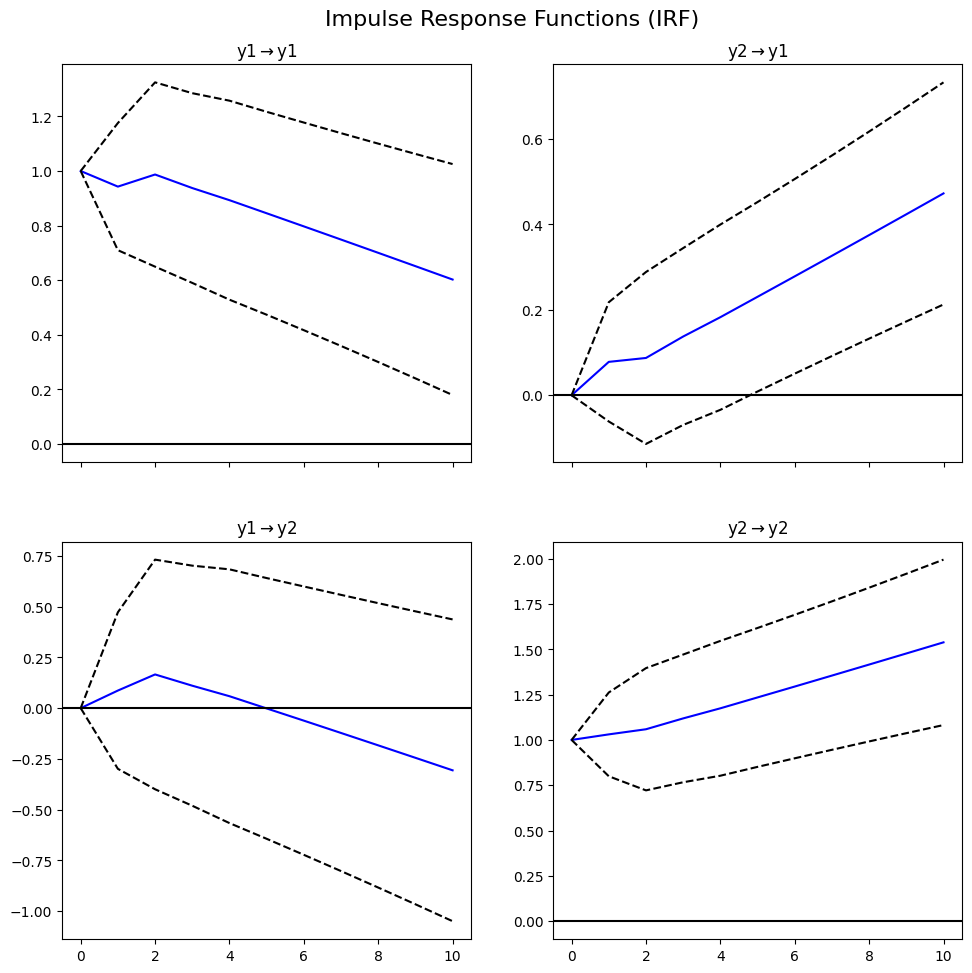

In [9]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.var_model import VARResults

# Генерация синтетических данных для двух переменных
np.random.seed(42)
n_samples = 200
t = np.arange(n_samples)

# Создаем два временных ряда с коинтеграцией
y1 = 0.8 * t + np.cumsum(np.random.normal(0, 1, n_samples))
y2 = 1.2 * y1 + np.cumsum(np.random.normal(0, 1, n_samples))

# Создаем DataFrame
data = pd.DataFrame({'y1': y1, 'y2': y2})

# Проверка на единичные корни (ADF тест)
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print("ADF Test for y1:")
check_stationarity(data['y1'])

print("\nADF Test for y2:")
check_stationarity(data['y2'])

# Построение VECM модели
vecm_model = VECM(data, k_ar_diff=2, coint_rank=1)  # Предполагаем один коинтеграционный вектор
vecm_fit = vecm_model.fit()

# Вычисление импульсно-ответных функций
irf = vecm_fit.irf(10)  # Горизонт времени = 10 периодов

# Визуализация IRF
fig = irf.plot()
plt.suptitle('Impulse Response Functions (IRF)', fontsize=16)
plt.show()




## 7. Пример: VECM для уровня цен и заработной платы


Рассмотрим пример с двумя переменными: уровнем цен $ P_t $ и заработной платой $ W_t $. Предположим, что эти переменные коинтегрированы с одним коинтеграционным отношением ($ r = 1 $). Мы построим VEC-модель для анализа их взаимосвязей.



## 1. Формулировка модели

VEC-модель для системы из двух переменных записывается следующим образом:

$$
\Delta \begin{bmatrix}
P_t \\
W_t
\end{bmatrix}
=
\begin{bmatrix}
\alpha_1 \\
\alpha_2
\end{bmatrix}
\begin{bmatrix}
\beta_1 & \beta_2
\end{bmatrix}
\begin{bmatrix}
P_{t-1} \\
W_{t-1}
\end{bmatrix}
+
\Gamma_1 \Delta \begin{bmatrix}
P_{t-1} \\
W_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{P,t} \\
\epsilon_{W,t}
\end{bmatrix}.
$$

### Разбор компонентов модели:

1. **Долгосрочная компонента**:
   $$
   \mathbf{\alpha} \mathbf{\beta}^\top \mathbf{y}_{t-1} =
   \begin{bmatrix}
   \alpha_1 \\
   \alpha_2
   \end{bmatrix}
   \begin{bmatrix}
   \beta_1 & \beta_2
   \end{bmatrix}
   \begin{bmatrix}
   P_{t-1} \\
   W_{t-1}
   \end{bmatrix}.
   $$
   Здесь:
   - $ \beta_1 P_{t-1} + \beta_2 W_{t-1} $ — отклонение от долгосрочного равновесия.
   - $ \alpha_1 $ и $ \alpha_2 $ — скорости коррекции для цены и заработной платы соответственно. Если $ \alpha_1 < 0 $ и $ \alpha_2 < 0 $, это означает, что система стремится вернуться к долгосрочному равновесию после отклонения.

2. **Краткосрочная компонента**:
   $$
   \Gamma_1 \Delta \begin{bmatrix}
   P_{t-1} \\
   W_{t-1}
   \end{bmatrix}.
   $$
   Матрица $ \Gamma_1 $ описывает влияние предыдущих изменений ($ \Delta P_{t-1} $, $ \Delta W_{t-1} $) на текущие изменения ($ \Delta P_t $, $ \Delta W_t $).

3. **Случайные ошибки**:
   $$
   \begin{bmatrix}
   \epsilon_{P,t} \\
   \epsilon_{W,t}
   \end{bmatrix}.
   $$
   Эти ошибки представляют необъясненную часть динамики системных переменных.



## 2. Гипотетические данные и параметры

Предположим, что после оценки модели получены следующие результаты:

1. **Коинтеграционный вектор ($ \mathbf{\beta} $)**:
   $$
   \mathbf{\beta} =
   \begin{bmatrix}
   \beta_1 \\
   \beta_2
   \end{bmatrix}
   =
   \begin{bmatrix}
   1 \\
   -0.8
   \end{bmatrix}.
   $$
   Это означает, что долгосрочное равновесие между ценами и заработной платой задается уравнением:
   $$
   P_{t-1} - 0.8 W_{t-1} = 0.
   $$

2. **Матрица скорости коррекции ($ \mathbf{\alpha} $)**:
   $$
   \mathbf{\alpha} =
   \begin{bmatrix}
   \alpha_1 \\
   \alpha_2
   \end{bmatrix}
   =
   \begin{bmatrix}
   -0.5 \\
   -0.3
   \end{bmatrix}.
   $$
   Это означает, что:
   - Уровень цен корректируется со скоростью $ -0.5 $ (при положительном отклонении цены от равновесия они снижаются).
   - Заработная плата корректируется со скоростью $ -0.3 $.

3. **Матрица краткосрочных динамик ($ \Gamma_1 $)**:
   $$
   \Gamma_1 =
   \begin{bmatrix}
   0.2 & 0.1 \\
   0.1 & 0.3
   \end{bmatrix}.
   $$
   Это означает, что:
   - Изменение уровня цен зависит на $ 0.2 $ от предыдущего изменения цен и на $ 0.1 $ от предыдущего изменения заработной платы.
   - Изменение заработной платы зависит на $ 0.1 $ от предыдущего изменения цен и на $ 0.3 $ от предыдущего изменения заработной платы.

4. **Случайные ошибки ($ \epsilon_{P,t}, \epsilon_{W,t} $)**:
   Ошибки предполагаются независимыми и нормально распределенными с математическим ожиданием 0 и некоторой ковариационной матрицей $ \Sigma $.



## 3. Интерпретация модели

### 3.1. Долгосрочная компонента

Долгосрочное равновесие между ценами и заработной платой задается уравнением:
$$
P_{t-1} - 0.8 W_{t-1} = 0.
$$
Это означает, что при долгосрочной стабильности уровень цен пропорционален заработной плате с коэффициентом $ 0.8 $. Если возникает отклонение от этого равновесия, система начинает его корректировать.

#### Скорость коррекции:
- Если $ P_{t-1} > 0.8 W_{t-1} $, то цена ($ P_t $) будет снижаться со скоростью $ -0.5 $, а заработная плата ($ W_t $) — со скоростью $ -0.3 $.
- Если $ P_{t-1} < 0.8 W_{t-1} $, то цена будет расти, а заработная плата — увеличиваться.

### 3.2. Краткосрочная компонента

Краткосрочные изменения зависят от предыдущих изменений через матрицу $ \Gamma_1 $:
$$
\Gamma_1 =
\begin{bmatrix}
0.2 & 0.1 \\
0.1 & 0.3
\end{bmatrix}.
$$
Например:
- Если за прошлый период уровень цен вырос на 1 единицу ($ \Delta P_{t-1} = 1 $), то текущее изменение уровня цен составит $ 0.2 \cdot 1 + 0.1 \cdot \Delta W_{t-1} $.
- Если заработная плата выросла на 1 единицу ($ \Delta W_{t-1} = 1 $), то текущее изменение заработной платы составит $ 0.1 \cdot \Delta P_{t-1} + 0.3 \cdot 1 $.



## 4. Прогнозирование

Предположим, что на момент $ t-1 $ известны значения $ P_{t-1} = 100 $ и $ W_{t-1} = 120 $. Тогда долгосрочное отклонение от равновесия равно:
$$
P_{t-1} - 0.8 W_{t-1} = 100 - 0.8 \cdot 120 = 100 - 96 = 4.
$$
Это положительное отклонение означает, что цены выше долгосрочного равновесия. В результате:
- Уровень цен начнет снижаться: $ \Delta P_t = -0.5 \cdot 4 = -2 $.
- Заработная плата также начнет снижаться: $ \Delta W_t = -0.3 \cdot 4 = -1.2 $.

Кроме того, если известны предыдущие изменения ($ \Delta P_{t-1} $, $ \Delta W_{t-1} $), можно добавить их влияние через матрицу $ \Gamma_1 $.




## 8. Преимущества и ограничения VECM

### Преимущества:
1. Учет долгосрочных отношений между переменными.
2. Возможность анализа краткосрочных динамик.
3. Применимость для нестационарных данных.

### Ограничения:
1. Требует предварительной проверки на коинтеграцию.
2. Сложность выбора порядка модели и количества коинтеграционных отношений.
3. Чувствительность к качеству данных.



## 9. Заключение

VEC-модель является мощным инструментом для анализа многомерных временных рядов, особенно когда переменные коинтегрированы. Она позволяет исследовать как долгосрочные, так и краткосрочные взаимосвязи между переменными, что особенно важно для макроэкономического анализа.

$\boxed{\text{Конец лекции}}$

ADF Test for P_t:
ADF Statistic: 0.9130
p-value: 0.9933
P_t is non-stationary.

ADF Test for W_t:
ADF Statistic: 1.1061
p-value: 0.9953
W_t is non-stationary.

Cointegration rank: 0
Optimal VAR order: {'aic': 0, 'bic': 0, 'hqic': 0, 'fpe': 0}
Det. terms outside the coint. relation & lagged endog. parameters for equation P_t
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.P_t        -0.0048      0.116     -0.041      0.967      -0.233       0.223
L1.W_t         0.0327      0.071      0.461      0.645      -0.106       0.172
L2.P_t         0.0866      0.116      0.744      0.457      -0.142       0.315
L2.W_t        -0.0343      0.071     -0.483      0.629      -0.173       0.105
Det. terms outside the coint. relation & lagged endog. parameters for equation W_t
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

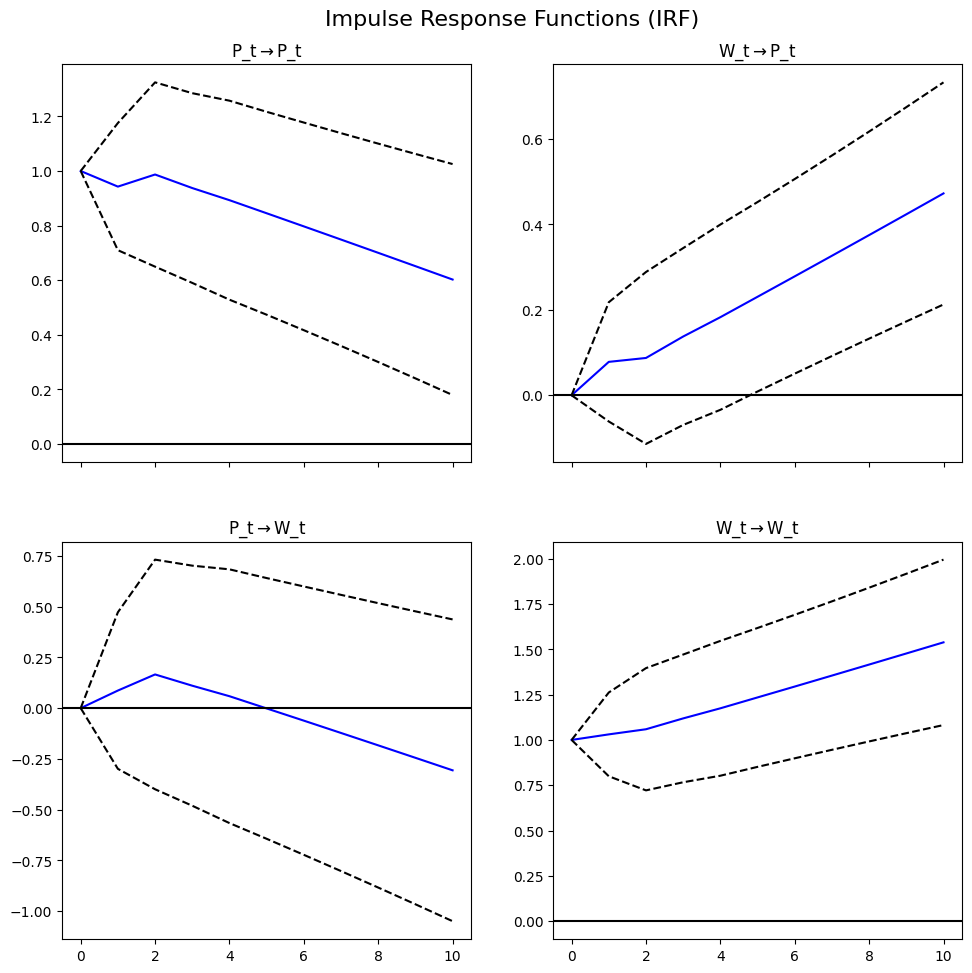

Forecast for next 10 periods:
          P_t         W_t
0  152.243750  199.722054
1  153.344781  201.059869
2  154.568421  202.588589
3  155.793341  204.122496
4  157.028208  205.674291
5  158.269549  207.233945
6  159.517387  208.802010
7  160.771826  210.378345
8  162.032874  211.962989
9  163.300579  213.555996


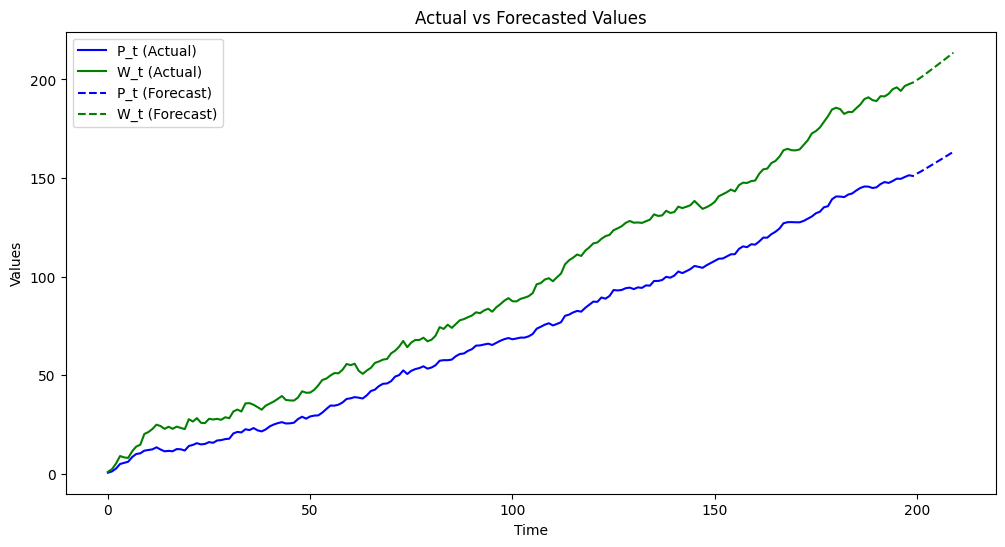

In [11]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM, select_coint_rank, select_order
from statsmodels.tsa.stattools import adfuller

# 1. Генерация синтетических данных
np.random.seed(42)
n_samples = 200
t = np.arange(n_samples)

# Создаем два временных ряда с коинтеграцией
# Уровень цен P_t
P_t = 0.8 * t + np.cumsum(np.random.normal(0, 1, n_samples))

# Заработная плата W_t, которая зависит от P_t
W_t = 1.2 * P_t + np.cumsum(np.random.normal(0, 1, n_samples))

# Создаем DataFrame
data = pd.DataFrame({'P_t': P_t, 'W_t': W_t})

# 2. Проверка на единичные корни (ADF тест)
def check_stationarity(series, name):
    result = adfuller(series)
    print(f"ADF Test for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] > 0.05:
        print(f"{name} is non-stationary.\n")
    else:
        print(f"{name} is stationary.\n")

check_stationarity(data['P_t'], 'P_t')
check_stationarity(data['W_t'], 'W_t')

# 3. Проверка на коинтеграцию (Тест Йохансена)
coint_rank = select_coint_rank(data, det_order=0, k_ar_diff=1, method='trace', signif=0.05)
print("Cointegration rank:", coint_rank.rank)

# 4. Выбор оптимального порядка VAR
optimal_order = select_order(data, maxlags=10, deterministic="nc", seasons=0)
print("Optimal VAR order:", optimal_order.selected_orders)

# 5. Оценка VECM модели
vecm_model = VECM(data, k_ar_diff=2, coint_rank=1, deterministic="nc")  # k_ar_diff = 2, coint_rank = 1
vecm_fit = vecm_model.fit()

# Вывод результатов модели
print(vecm_fit.summary())

# 6. Анализ импульсно-ответных функций (IRF)
irf = vecm_fit.irf(10)  # Горизонт времени = 10 периодов

# Визуализация IRF
fig = irf.plot(orth=False)  # orth=False для неортогональных IRF
plt.suptitle('Impulse Response Functions (IRF)', fontsize=16)
plt.show()

# 7. Прогнозирование
# Сделаем прогноз на 10 шагов вперед
forecast = vecm_fit.predict(steps=10)

# Преобразуем результат прогноза в DataFrame для удобства работы
forecast_df = pd.DataFrame(forecast, columns=['P_t', 'W_t'])

print("Forecast for next 10 periods:")
print(forecast_df)

# 8. Визуализация данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['P_t'], label='P_t (Actual)', color='blue')
plt.plot(data.index, data['W_t'], label='W_t (Actual)', color='green')

# Добавляем прогноз
forecast_index = pd.RangeIndex(start=data.index[-1] + 1, stop=data.index[-1] + 1 + len(forecast_df))

plt.plot(forecast_index, forecast_df['P_t'], label='P_t (Forecast)', linestyle='--', color='blue')
plt.plot(forecast_index, forecast_df['W_t'], label='W_t (Forecast)', linestyle='--', color='green')

plt.title('Actual vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()